# Step 1: Import Necessary Libraries

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Step 2: Load and Preprocess the CIFAR-10 Dataset

In [30]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


# Step 3: Load Pre-trained MobileNet Model

In [31]:
# Load pre-trained MobileNet model without top classification layer
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add custom classification layers on top of MobileNet
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# Create final model
model = Model(inputs=base_model.input, outputs=predictions)


The warnings are TensorFlow deprecation warnings, which indicate that certain functions or methods are deprecated and may be removed in future versions of TensorFlow. we can ignore these warnings for now, but we better update the code to use the recommended alternatives leater .

The warning about the input_shape being undefined or non-square is because the input shape (32, 32, 3) is not one of the standard sizes expected by MobileNet. MobileNet typically expects input images of size (224, 224, 3). 

The other warnings are related to internal TensorFlow operations and should not affect the functionality of the code.




# Step 4: Compile and Train the Model

In [32]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10


782/782 [==============================] - 249s 307ms/step - loss: 1.0416 - accuracy: 0.6538 - val_loss: 0.7509 - val_accuracy: 0.7530
Epoch 2/10
782/782 [==============================] - 237s 303ms/step - loss: 0.7076 - accuracy: 0.7647 - val_loss: 0.7177 - val_accuracy: 0.7524
Epoch 3/10
782/782 [==============================] - 248s 317ms/step - loss: 0.5969 - accuracy: 0.8007 - val_loss: 0.6791 - val_accuracy: 0.7724
Epoch 4/10
782/782 [==============================] - 239s 305ms/step - loss: 0.5249 - accuracy: 0.8247 - val_loss: 0.7145 - val_accuracy: 0.7596
Epoch 5/10
782/782 [==============================] - 256s 328ms/step - loss: 0.4741 - accuracy: 0.8434 - val_loss: 0.7140 - val_accuracy: 0.7758
Epoch 6/10
782/782 [==============================] - 233s 299ms/step - loss: 0.4305 - accuracy: 0.8574 - val_loss: 0.6829 - val_accuracy: 0.7784
Epoch 7/10
782/782 [==============================] - 227s 290ms/step - loss: 0.3916 - accuracy: 0.8703 - val_loss: 0.7185

# Step 5: Evaluate the Model

In [34]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


313/313 [==============================] - 9s 28ms/step - loss: 0.6884 - accuracy: 0.8009
Test Loss: 0.6884, Test Accuracy: 0.8009


# Step 6: Visualize Training History

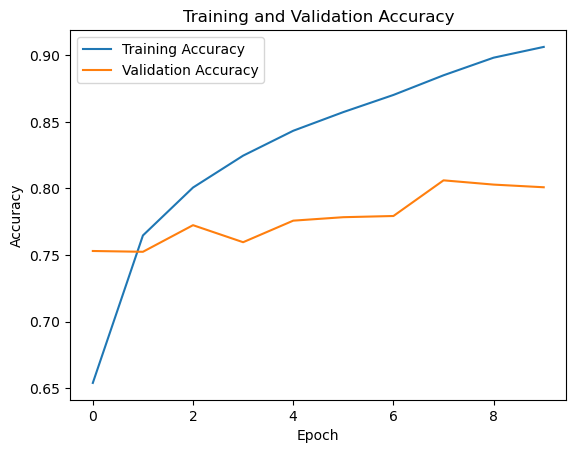

In [35]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()
